In [ ]:
%cd drive/MyDrive/Colab\ Notebooks/HouseholdDebt

/content/drive/MyDrive/Colab Notebooks/HouseholdDebt


# 한글세팅

In [ ]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [ ]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [ ]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import seaborn as sns

In [ ]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [ ]:
import pandas as pd

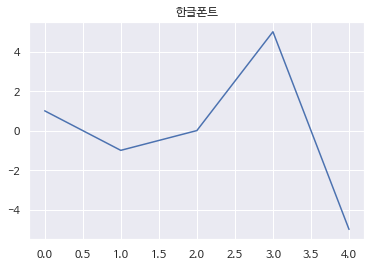

In [ ]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

In [ ]:
!pip install statsmodels --upgrade

  Using cached statsmodels-0.13.2.tar.gz (17.9 MB)
ERROR: Operation cancelled by user
  Installing build dependencies ... 

# 20대 전세자금대출 VECM


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data load

### Macro data load

In [ ]:
df = pd.read_csv('data/all_monthly_macro_data.csv', index_col=0)

In [ ]:
df = df.join([pd.read_csv('data/charter_monthly_macro_data.csv', index_col=0)])

In [ ]:
df_ur = pd.read_csv('data/월별_성_연령별_실업률.csv')

In [ ]:
df_ur

,시점,성별,연령계층별,데이터
0,2010. 01,계,계,5.0
1,2010. 01,계,15 - 19세,18.7
2,2010. 01,계,20 - 29세,8.6
3,2010. 01,계,30 - 39세,3.8
4,2010. 01,계,40 - 49세,2.9
...,...,...,...,...
3019,2021. 12,여자,20 - 29세,5.4
3020,2021. 12,여자,30 - 39세,2.6
3021,2021. 12,여자,40 - 49세,2.0
3022,2021. 12,여자,50 - 59세,1.4


In [ ]:
df['unemployment_rate'] = list(df_ur[(df_ur['성별']=='계') & (df_ur['연령계층별']=='20 - 29세')]['데이터'])[:-3]

### Loan data load

In [ ]:
df_loan = pd.read_csv('data/house_loan.csv')

In [ ]:
quaterly_loan = df_loan[(df_loan['연령대'] == '20대') & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

In [ ]:
quaterly_loan

기준분기
2017Q3    1296879
2017Q4    1402521
2018Q1    1756474
2018Q2    1889366
2018Q3    2083272
2018Q4    2335005
2019Q1    2508955
2019Q2    3043503
2019Q3    3700829
2019Q4    4040031
2020Q1    5476486
2020Q2    6039073
2020Q3    6619870
2020Q4    7185837
2021Q1    7240274
2021Q2    7895613
2021Q3    8149890
Name: 대출금액합계<미적용, 십만원>, dtype: int64

In [ ]:
# df['charter_loan_20'] = df_loan[(df_loan['연령대'] == '20대') & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

### Cubic spine interpolate

In [ ]:
from scipy.interpolate import CubicSpline

In [ ]:
quarterly_xs = np.arange(9, 60, 3)
quarterly_ys = np.array(quaterly_loan)

In [ ]:
cs = CubicSpline(quarterly_xs, quarterly_ys)

In [ ]:
monthly_xs = np.arange(9, 58)
monthly_ys = cs(monthly_xs)

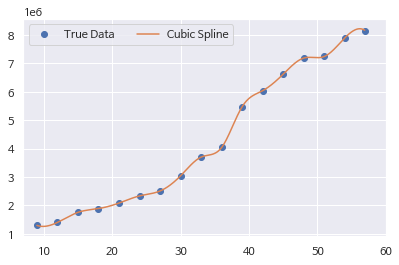

In [ ]:
xs = np.arange(9, 57, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(quarterly_xs, quarterly_ys, 'o', label='True Data')
ax.plot(xs, cs(xs), label="Cubic Spline")
ax.set_xlim(7, 60)
ax.legend(ncol=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


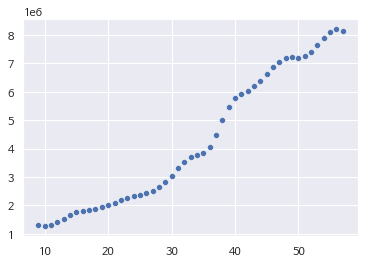

In [ ]:
sns.scatterplot(monthly_xs, monthly_ys)
None

In [ ]:
#df_monthly_loan = pd.DataFrame(data={'charter_loan_20': monthly_ys}, index=pd.date_range('2017-09-01', '2021-10-01', freq='M'))
df_monthly_loan = pd.DataFrame(data={'charter_loan_20': monthly_ys}, index=df.index[92:])

In [ ]:
df = df.join([df_monthly_loan])

In [ ]:
df

,loan_ir,house_price_index,kospi,kosdaq,house_savings,cpi,guaranteed_loan_ir,house_charter_index,charter_search_trend_20,unemployment_rate,charter_loan_20
2010-01-31,6.02,78.369310,1602.43,496.57,364008.3,85.351,6.06,68.443219,NaN,8.6,NaN
2010-02-28,5.92,78.573339,1594.58,507.03,383286.1,85.523,5.66,68.836600,NaN,9.7,NaN
2010-03-31,5.80,78.746871,1692.85,515.74,384254.0,85.696,5.68,69.273218,NaN,8.8,NaN
2010-04-30,5.46,78.884420,1741.56,523.75,387818.2,86.041,5.49,69.687403,NaN,8.3,NaN
2010-05-31,5.16,78.903691,1641.25,489.42,386525.6,86.128,5.35,69.987543,NaN,6.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,2.89,98.861559,3203.92,981.78,752021.7,102.050,2.67,99.345186,68.34791,9.3,7.638628e+06
2021-06-30,2.92,100.000000,3296.68,1029.96,757140.2,102.050,2.65,100.000000,67.46641,8.8,7.895613e+06
2021-07-31,2.98,100.852770,3202.32,1031.14,756147.3,102.260,2.76,100.588440,71.47022,7.1,8.108036e+06
2021-08-31,3.10,101.823268,3199.27,1038.33,757885.4,102.750,2.85,101.225843,89.71616,5.8,8.213570e+06


### Visualization

In [ ]:
from sklearn.preprocessing import StandardScaler

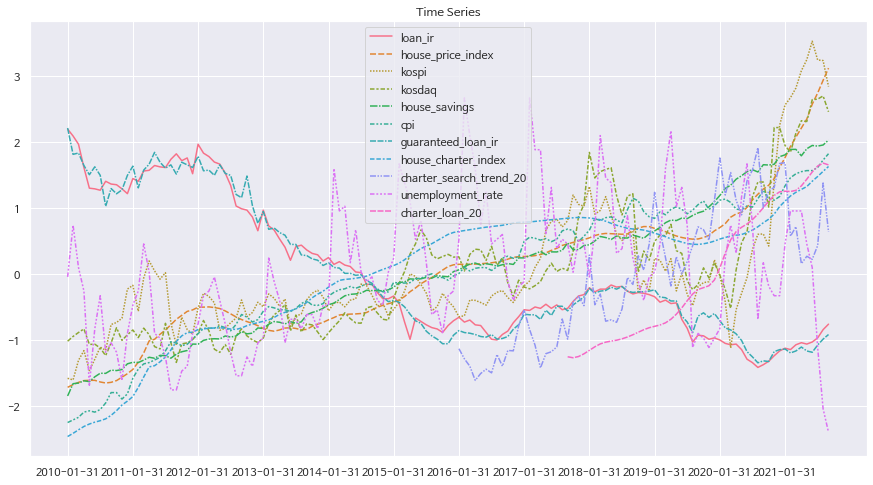

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### Select variable and cut

In [ ]:
df = df[['house_savings', 'guaranteed_loan_ir', 'unemployment_rate', 'cpi', 'house_charter_index', 'charter_search_trend_20' ,'charter_loan_20']]

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

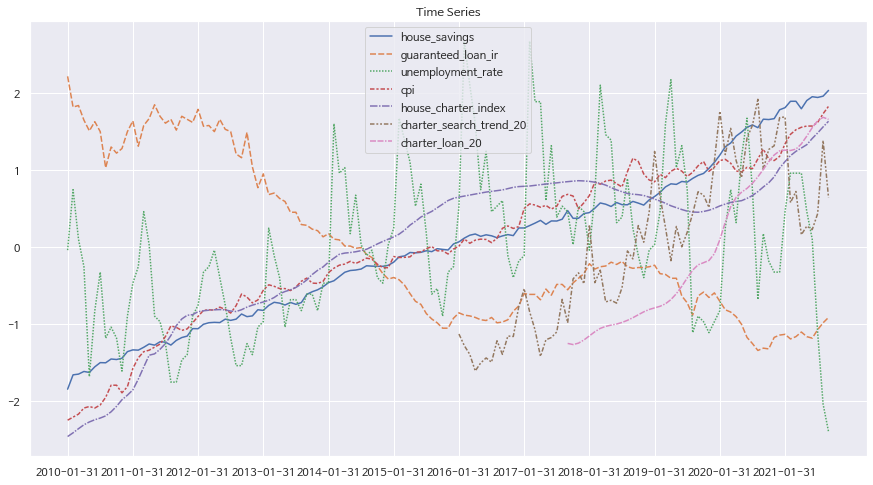

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
df = df[92:]

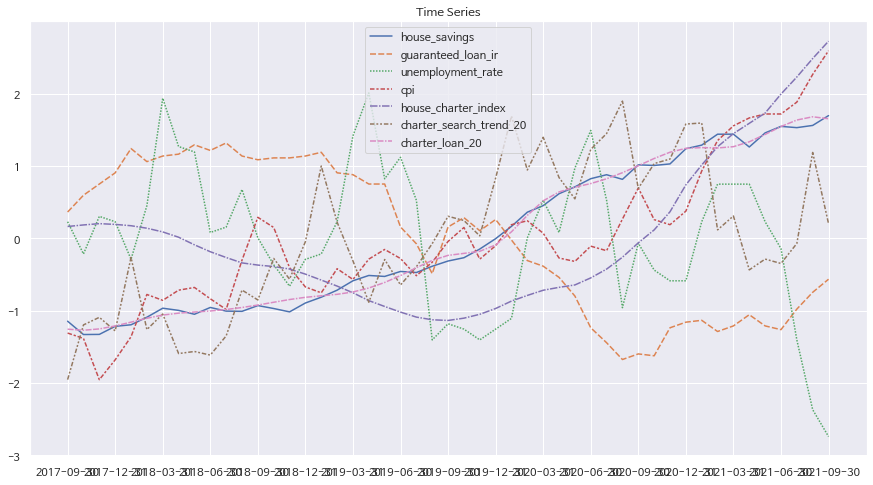

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 3 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### log

In [ ]:
df.columns

Index(['house_savings', 'guaranteed_loan_ir', 'unemployment_rate', 'cpi',
       'house_charter_index', 'charter_search_trend_20', 'charter_loan_20'],
      dtype='object')

In [ ]:
for col in df.columns:
  if col in ['guaranteed_loan_ir', 'unemployment_rate']:
    print(col)
    continue
  df[col] = df[col].apply(np.log)

guaranteed_loan_ir
unemployment_rate


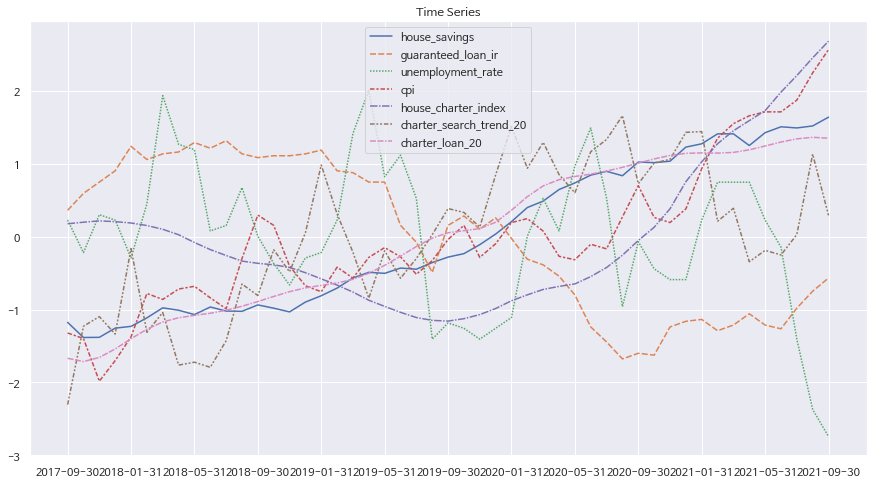

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
df

,house_savings,guaranteed_loan_ir,unemployment_rate,cpi,house_charter_index,charter_search_trend_20,charter_loan_20
2017-09-30,13.311549,3.28,9.3,4.586721,4.558418,3.788580,14.075471
2017-10-31,13.294092,3.37,8.7,4.585753,4.558975,4.010177,14.048375
2017-11-30,13.294265,3.43,9.4,4.578282,4.559445,4.037353,14.082390
2017-12-31,13.304871,3.49,9.3,4.581881,4.559171,3.988102,14.153782
2018-01-31,13.306913,3.62,8.6,4.586049,4.558693,4.229605,14.238651
2018-02-28,13.316718,3.55,9.6,4.593654,4.557797,3.993026,14.318218
2018-03-31,13.328311,3.58,11.6,4.592602,4.556453,4.049060,14.378819
2018-04-30,13.325537,3.59,10.7,4.594423,4.554531,3.900342,14.413914
2018-05-31,13.320535,3.64,10.6,4.594908,4.551771,3.908596,14.433926
2018-06-30,13.329274,3.61,9.1,4.592885,4.549249,3.894047,14.451752


## Unit root test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.789
 No. Lags Chosen       = 0
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.9915. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "guaranteed_loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7016
 No. Lags Chosen       = 0
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.8463. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Nul

In [ ]:
df.columns

Index(['house_savings', 'guaranteed_loan_ir', 'unemployment_rate', 'cpi',
       'house_charter_index', 'charter_search_trend_20', 'charter_loan_20'],
      dtype='object')

In [ ]:
stationary_cols_diff_0 = ['unemployment_rate', 'house_charter_index']

In [ ]:
for name, column in df.diff().dropna().iteritems():
  if name in stationary_cols_diff_0:
    continue
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8995
 No. Lags Chosen       = 2
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0454. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "guaranteed_loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.6437
 No. Lags Chosen       = 0
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "cpi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

In [ ]:
stationary_cols_diff_1 = ['house_savings', 'guaranteed_loan_ir','charter_search_trend_20']

In [ ]:
for name, column in df.diff().dropna().diff().dropna().iteritems():
  if name in stationary_cols_diff_0 or name in stationary_cols_diff_1:
    continue
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "cpi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8659
 No. Lags Chosen       = 7
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.0495. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "charter_loan_20" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1816
 No. Lags Chosen       = 5
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.0211. Rejecting Null Hypothesis.
 => Series is Stationary.




In [ ]:
stationary_cols_diff_2 = ['cpi', 'charter_loan_20']

## Granger's causality

In [ ]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
df_for_grangers = df[stationary_cols_diff_0].join([df.diff()[stationary_cols_diff_1], df.diff().diff()[stationary_cols_diff_2]]).dropna()

In [ ]:
grangers_causation_matrix(df_for_grangers, variables = df.columns, maxlag=12)

,house_savings_x,guaranteed_loan_ir_x,unemployment_rate_x,cpi_x,house_charter_index_x,charter_search_trend_20_x,charter_loan_20_x
house_savings_y,1.0000,0.0978,0.000,0.0000,0.0000,0.0000,0.0000
guaranteed_loan_ir_y,0.0000,1.0000,0.000,0.0000,0.0000,0.0000,0.0000
unemployment_rate_y,0.0000,0.0003,1.000,0.0000,0.0059,0.0000,0.0008
cpi_y,0.0057,0.0004,0.000,1.0000,0.1469,0.0000,0.0000
house_charter_index_y,0.0005,0.0000,0.000,0.0000,1.0000,0.0024,0.0000
charter_search_trend_20_y,0.0026,0.0000,0.014,0.0000,0.0000,1.0000,0.0000
charter_loan_20_y,0.0000,0.0000,0.000,0.0022,0.0000,0.0000,1.0000


## Reorder variable

In [ ]:
df.columns

Index(['house_savings', 'guaranteed_loan_ir', 'unemployment_rate', 'cpi',
       'house_charter_index', 'charter_search_trend_20', 'charter_loan_20'],
      dtype='object')

In [ ]:
df = df[['unemployment_rate', 'house_savings', 'cpi', 'guaranteed_loan_ir', 'house_charter_index', 'charter_search_trend_20', 'charter_loan_20']]

In [ ]:
df

,unemployment_rate,house_savings,cpi,guaranteed_loan_ir,house_charter_index,charter_search_trend_20,charter_loan_20
2017-09-30,9.3,13.311549,4.586721,3.28,4.558418,3.788580,14.075471
2017-10-31,8.7,13.294092,4.585753,3.37,4.558975,4.010177,14.048375
2017-11-30,9.4,13.294265,4.578282,3.43,4.559445,4.037353,14.082390
2017-12-31,9.3,13.304871,4.581881,3.49,4.559171,3.988102,14.153782
2018-01-31,8.6,13.306913,4.586049,3.62,4.558693,4.229605,14.238651
2018-02-28,9.6,13.316718,4.593654,3.55,4.557797,3.993026,14.318218
2018-03-31,11.6,13.328311,4.592602,3.58,4.556453,4.049060,14.378819
2018-04-30,10.7,13.325537,4.594423,3.59,4.554531,3.900342,14.413914
2018-05-31,10.6,13.320535,4.594908,3.64,4.551771,3.908596,14.433926
2018-06-30,9.1,13.329274,4.592885,3.61,4.549249,3.894047,14.451752


In [ ]:
df.columns

Index(['unemployment_rate', 'house_savings', 'cpi', 'guaranteed_loan_ir',
       'house_charter_index', 'charter_search_trend_20', 'charter_loan_20'],
      dtype='object')

## Cointegration rank

In [ ]:
def cointegration_test(df, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=det_order,k_ar_diff=k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(df.drop(stationary_cols_diff_0, axis=1), -1, 3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
house_savings ::  119.61    > 60.0627   =>   True
cpi    ::  73.41     > 40.1749   =>   True
guaranteed_loan_ir ::  38.93     > 24.2761   =>   True
charter_search_trend_20 ::  13.04     > 12.3212   =>   True
charter_loan_20 ::  1.92      > 4.1296    =>   False


In [ ]:
rank_test = select_coint_rank(df.drop(stationary_cols_diff_0, axis=1), -1, 3, method="trace",
                              signif=0.05)
rank_test.rank

4

In [ ]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,5,119.6,60.06
1,5,73.41,40.17
2,5,38.93,24.28
3,5,13.04,12.32
4,5,1.924,4.130


## Lag order selection

In [ ]:
lag_order = select_order(data=df, maxlags=2, deterministic="nc", seasons=12)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,-54.91,-49.62,2.050e-24,-52.93
1,-58.05,-50.82,1.759e-25,-55.34
2,-61.35*,-52.17*,3.013e-26*,-57.91*


In [ ]:
lag_order = select_order(data=df, maxlags=12, deterministic="n", seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

ValueError: ignored

## Parameter estimation

In [ ]:
pd.date_range('2017-09-30', '2021-10-01', freq='M')

DatetimeIndex(['2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
model = VECM(df,
             dates=pd.date_range('2017-09-30', '2021-10-01', freq='M'),
             freq='M',
             k_ar_diff=2,
             coint_rank=4,
             deterministic='nc',
             seasons=0)

In [ ]:
vecm_res = model.fit()

In [ ]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.unemployment_rate,-0.2534,0.166,-1.526,0.127,-0.579,0.072
L1.house_savings,-8.8697,23.853,-0.372,0.710,-55.620,37.881
L1.cpi,37.1111,29.087,1.276,0.202,-19.899,94.121
L1.guaranteed_loan_ir,-3.1560,1.710,-1.845,0.065,-6.508,0.196
L1.house_charter_index,-5.3518,128.112,-0.042,0.967,-256.446,245.743
L1.charter_search_trend_20,-5.9378,1.511,-3.930,0.000,-8.899,-2.976
L1.charter_loan_20,7.7156,6.370,1.211,0.226,-4.769,20.200
L2.unemployment_rate,-0.3652,0.147,-2.477,0.013,-0.654,-0.076
L2.house_savings,-0.4330,21.193,-0.020,0.984,-41.970,41.104
L2.cpi,24.0193,28.147,0.853,0.393,-31.148,79.187


## Forecasts

In [ ]:
vecm_res.predict(steps=5)

array([[ 7.28146384, 13.55804049,  4.63598574,  3.07258584,  4.62814529,
         4.34912889, 15.90397841],
       [ 8.49438594, 13.56864613,  4.63676848,  3.11241879,  4.63255705,
         4.28648108, 15.91282318],
       [ 9.54025593, 13.58113197,  4.6378841 ,  3.08840164,  4.63658504,
         4.27493954, 15.95072039],
       [10.73778167, 13.59024172,  4.64013146,  2.98029174,  4.6397781 ,
         4.21115832, 16.01246656],
       [11.3622262 , 13.59714901,  4.64148913,  2.85481614,  4.64223579,
         4.13566227, 16.08000252]])

In [ ]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[ 7.28146384 13.55804049  4.63598574  3.07258584  4.62814529  4.34912889
  15.90397841]
 [ 8.49438594 13.56864613  4.63676848  3.11241879  4.63255705  4.28648108
  15.91282318]
 [ 9.54025593 13.58113197  4.6378841   3.08840164  4.63658504  4.27493954
  15.95072039]
 [10.73778167 13.59024172  4.64013146  2.98029174  4.6397781   4.21115832
  16.01246656]
 [11.3622262  13.59714901  4.64148913  2.85481614  4.64223579  4.13566227
  16.08000252]]
lower:
[[ 6.05459473 13.55058635  4.63091106  2.97765092  4.62666049  4.19228438
  15.89418768]
 [ 7.02054883 13.56044576  4.62899725  2.99029667  4.62963585  4.10944854
  15.88476653]
 [ 7.88747914 13.57051807  4.62846657  2.95433049  4.63235735  4.05481941
  15.89774612]
 [ 8.98315081 13.57570607  4.62958286  2.82130723  4.63440184  3.97325447
  15.93011468]
 [ 9.49701393 13.57986353  4.62966714  2.66423746  4.6358133   3.88297995
  15.96575198]]
upper:
[[ 8.50833295 13.56549463  4.64106041  3.16752077  4.62963008  4.5059734
  15.913769

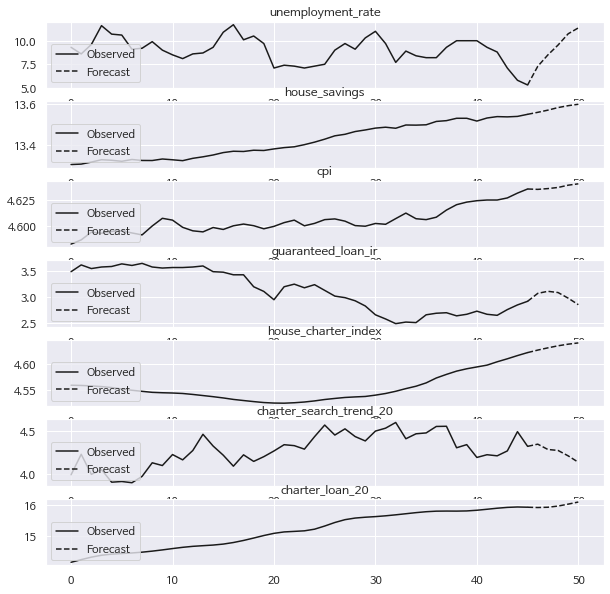

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

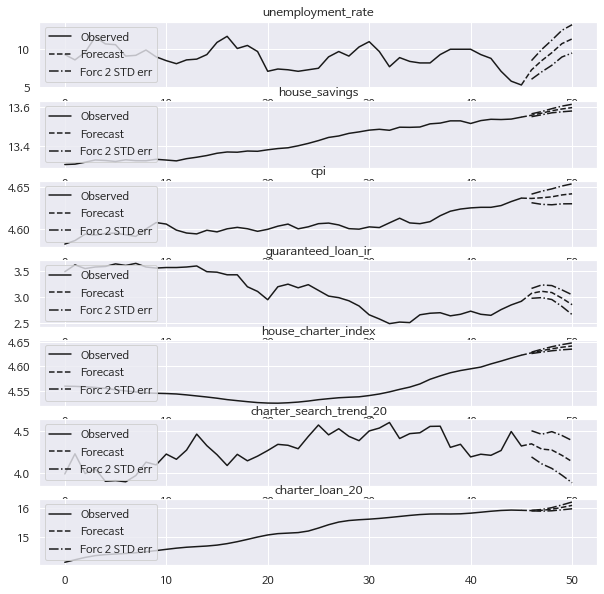

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [ ]:
granger_results = vecm_res.test_granger_causality(caused="charter_loan_20", causing='cpi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
1.443,2.681,0.234,"(3, 119)"


### Instantaneous causality

In [ ]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="cpi")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
2.292,12.59,0.891,6


### Impulse response analysis

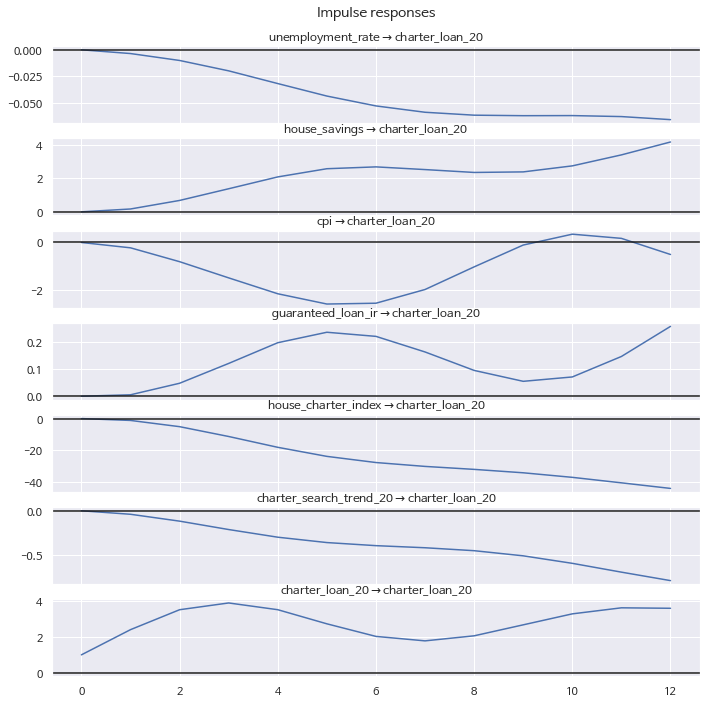

In [ ]:
num_periods = 12
ir = vecm_res.irf(periods=num_periods)
#ir.plot(orth=False, plot_stderr=False, figsize=(15, 15))
ir.plot(orth=False, plot_stderr=False, response='charter_loan_20')
None

## Diagnostics

### Testing for nonormality

In [ ]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
22.63,23.68,0.067,14


### Checking for residual autocorrelation

In [ ]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
596.4,513.1,0.000,462
